In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

def experiment(X, y):
    RandomForestClassifier.cls = cls
    # 1. Получение важности из Sklearn, rfpimp, treeinterpreter (Возвращает (Series, Series, Series, RF_model, Optuna_study))
    imp_sklearn, imp_rfpimp, imp_tree, rf, study = sklearn_importance(X, y)
    best_params = study.best_params
    print(f'best_params: {best_params}')
    print(f'the importance of sklearn: {imp_sklearn}')
    print(f'the importance of rfpimp: {imp_rfpimp}')
    print(f'the importance of treeinterpreter: {imp_tree}')
    
    # 2. Получение важности из ufi_importance_calculation (Возвращает Series)
    X_np = X.values 
    y_np = y.values  
    # Копируем значение из нового атрибута в старый
    rf.n_features_ = rf.n_features_in_
    imp = rf.cls(X_np, y_np)
    imp_series = pd.Series(imp, index=X.columns)
    imp_ufi = imp_series.sort_values(ascending=False)
    print(f'the importance of ufi: {imp_ufi}')
    
    # 3. Получение важности из R randomForest (Возвращает Series)
    imp_r_rf = r_randomforest_importance(X, y, **best_params)
    print(f'the importance of  R_randomForest: {imp_r_rf}')
    
    # 4. Получение важности из R ranger (Возвращает Series)
    imp_r_ranger = r_ranger_importance_air(X, y, **best_params)
    print(f'the importance of R_range: {imp_r_ranger}')
    
    # 5. Получение важности из randomForestSRC (Возвращает Series)
    imp_r_src = r_randomforestsrc_importance(X, y, **best_params)
    print(f'the importance of randomForestSRC: {imp_r_src}')

    # 6. Получение важности из r_party_cforest (Возвращает Series)
    imp_r_party = r_party_cforest_importance_classification(
        X, y, **best_params)
    print(f'the importance of r_party_cforest: {imp_r_party}')

    # 7. Получение важности из r_partykit_cforest (Возвращает Series)
    imp_r_partykit = r_partykit_importance(X, y, **best_params)
    print(f'the importance of r_partykit: {imp_r_partykit}')
    
    # Фильтруем None на случай сбоя R-функции и формируем списки
    importance_series_list = []
    titles_list = []

    importance_series_list.append(imp_sklearn)
    titles_list.append('Sklearn(MDI)')

    importance_series_list.append(imp_rfpimp)
    titles_list.append('Rfpimp(MDA)')

    importance_series_list.append(imp_tree)
    titles_list.append('treeinterpreter(MDI-OOB)')

    importance_series_list.append(imp_ufi)
    titles_list.append('UFI(MDI-OOB)')

    importance_series_list.append(imp_r_rf)
    titles_list.append('R_RF(MDI)')

    importance_series_list.append(imp_r_ranger)
    titles_list.append('R_Ranger(AIR)')

    importance_series_list.append(imp_r_src)
    titles_list.append('RFSRC(MDA)')

    importance_series_list.append(imp_r_party)
    titles_list.append('Party(MDA)')

    importance_series_list.append(imp_r_partykit)
    titles_list.append('Partykit(MDA)')
    
    picture(importance_series_list, titles_list)
    return importance_series_list

<font size="8">Import the necessary libraries and load the dataset.</font>

In [2]:
import pandas as pd
from importance_lib.pic import picture
from importance_lib.python_implementations import sklearn_importance
import numpy as np
from importance_lib.r_implementations import r_partykit_importance, r_randomforest_importance, r_ranger_importance_air, r_party_cforest_importance_classification, r_randomforestsrc_importance
from importance_lib.UFI import cls
import random

data = pd.read_csv("rent.csv")
features = data.columns[:5].tolist()
X, y = data[features], data["interest_level"]

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.
R callback write-console: In addition:   
R callback write-console: Warning message:
  
R callback write-console: In Sys.setlocale("LC_ALL", "en_US.UTF-8") :  
R callback write-console: 
   
R callback write-console:  using locale code page other than 1251 may cause problems
  


In [2]:
from sklearn.ensemble import RandomForestClassifier

# 1. Сначала добавляем метод cls к классу
RandomForestClassifier.cls = cls

# 2. Теперь вызываем функцию sklearn_importance, которая создаст новую модель
fi, imp_series, ti_series, rf, study = sklearn_importance(X, y)
# 2. Преобразуем данные в numpy arrays
X_np = X.values  # или X.to_numpy()
y_np = y.values  # или y.to_numpy()
# Копируем значение из нового атрибута в старый
rf.n_features_ = rf.n_features_in_
# 3. Теперь вызываем метод с numpy arrays
imp_cls = rf.cls(X_np, y_np)  # ✅

[I 2026-02-06 12:41:47,765] A new study created in memory with name: no-name-ea59233c-8679-473b-b89a-08c895770d4a
[I 2026-02-06 12:41:49,383] Trial 0 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 147, 'max_depth': 2, 'min_samples_leaf': 18, 'max_features': 0.7}. Best is trial 0 with value: 0.6962589600060789.
[I 2026-02-06 12:41:50,765] Trial 1 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 130, 'max_depth': 2, 'min_samples_leaf': 16, 'max_features': 0.25}. Best is trial 0 with value: 0.6962589600060789.
[I 2026-02-06 12:41:51,289] Trial 2 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 49, 'max_depth': 1, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6962589600060789.
[I 2026-02-06 12:41:52,134] Trial 3 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 83, 'max_depth': 1, 'min_samples_leaf': 10, 'max_features': 1.0}. Best is trial 0 with value: 0.696258

{'n_estimators': 147, 'max_depth': 3, 'min_samples_leaf': 20, 'max_features': 0.5}


In [7]:
print(imp_cls)

[0.00260361 0.00605207 0.03951144 0.00512224 0.00397035]


In [8]:
print(fi)

price        0.586003
bedrooms     0.119104
longitude    0.112110
latitude     0.093363
bathrooms    0.089419
dtype: float64


In [9]:
import pandas as pd

# 1. Создаем Series, где индекс — это названия колонок из X
imp_series = pd.Series(imp_cls, index=X.columns)

# 2. Сортируем по убыванию
imp_series_sorted = imp_series.sort_values(ascending=False)

print(imp_series_sorted)

price        0.039511
bedrooms     0.006052
longitude    0.005122
latitude     0.003970
bathrooms    0.002604
dtype: float64


<font size="8">Source features.</font>

[I 2026-02-06 12:58:36,327] A new study created in memory with name: no-name-59188fc5-c7ad-4d60-9802-1f48c82a5276
[I 2026-02-06 12:58:36,958] Trial 0 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 52, 'max_depth': 1, 'min_samples_leaf': 15, 'max_features': 1.0}. Best is trial 0 with value: 0.6962589600060789.
[I 2026-02-06 12:58:38,020] Trial 1 finished with value: 0.7000075985917277 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7000075985917277.
[I 2026-02-06 12:58:38,405] Trial 2 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 33, 'max_depth': 1, 'min_samples_leaf': 14, 'max_features': 1.0}. Best is trial 1 with value: 0.7000075985917277.
[I 2026-02-06 12:58:39,363] Trial 3 finished with value: 0.7002102277044654 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_leaf': 13, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.7002102

{'n_estimators': 122, 'max_depth': 13, 'min_samples_leaf': 12, 'max_features': 0.7}
best_params: {'n_estimators': 122, 'max_depth': 13, 'min_samples_leaf': 12, 'max_features': 0.7}
the importance of sklearn: price        0.396399
latitude     0.221759
longitude    0.214011
bedrooms     0.143841
bathrooms    0.023990
dtype: float64
the importance of rfpimp: price        0.122784
bedrooms     0.079526
longitude    0.029886
latitude     0.018033
bathrooms    0.000304
dtype: float64
the importance of treeinterpreter: price        0.072850
bedrooms     0.046384
latitude     0.033920
longitude    0.033280
bathrooms    0.005537
dtype: float64
the importance of ufi: price        0.098847
bedrooms     0.034534
longitude    0.027695
latitude     0.026981
bathrooms    0.004014
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude
Importance matrix shape: (5, 1)
Successfully computed variable importance
the importance of  R_randomForest:

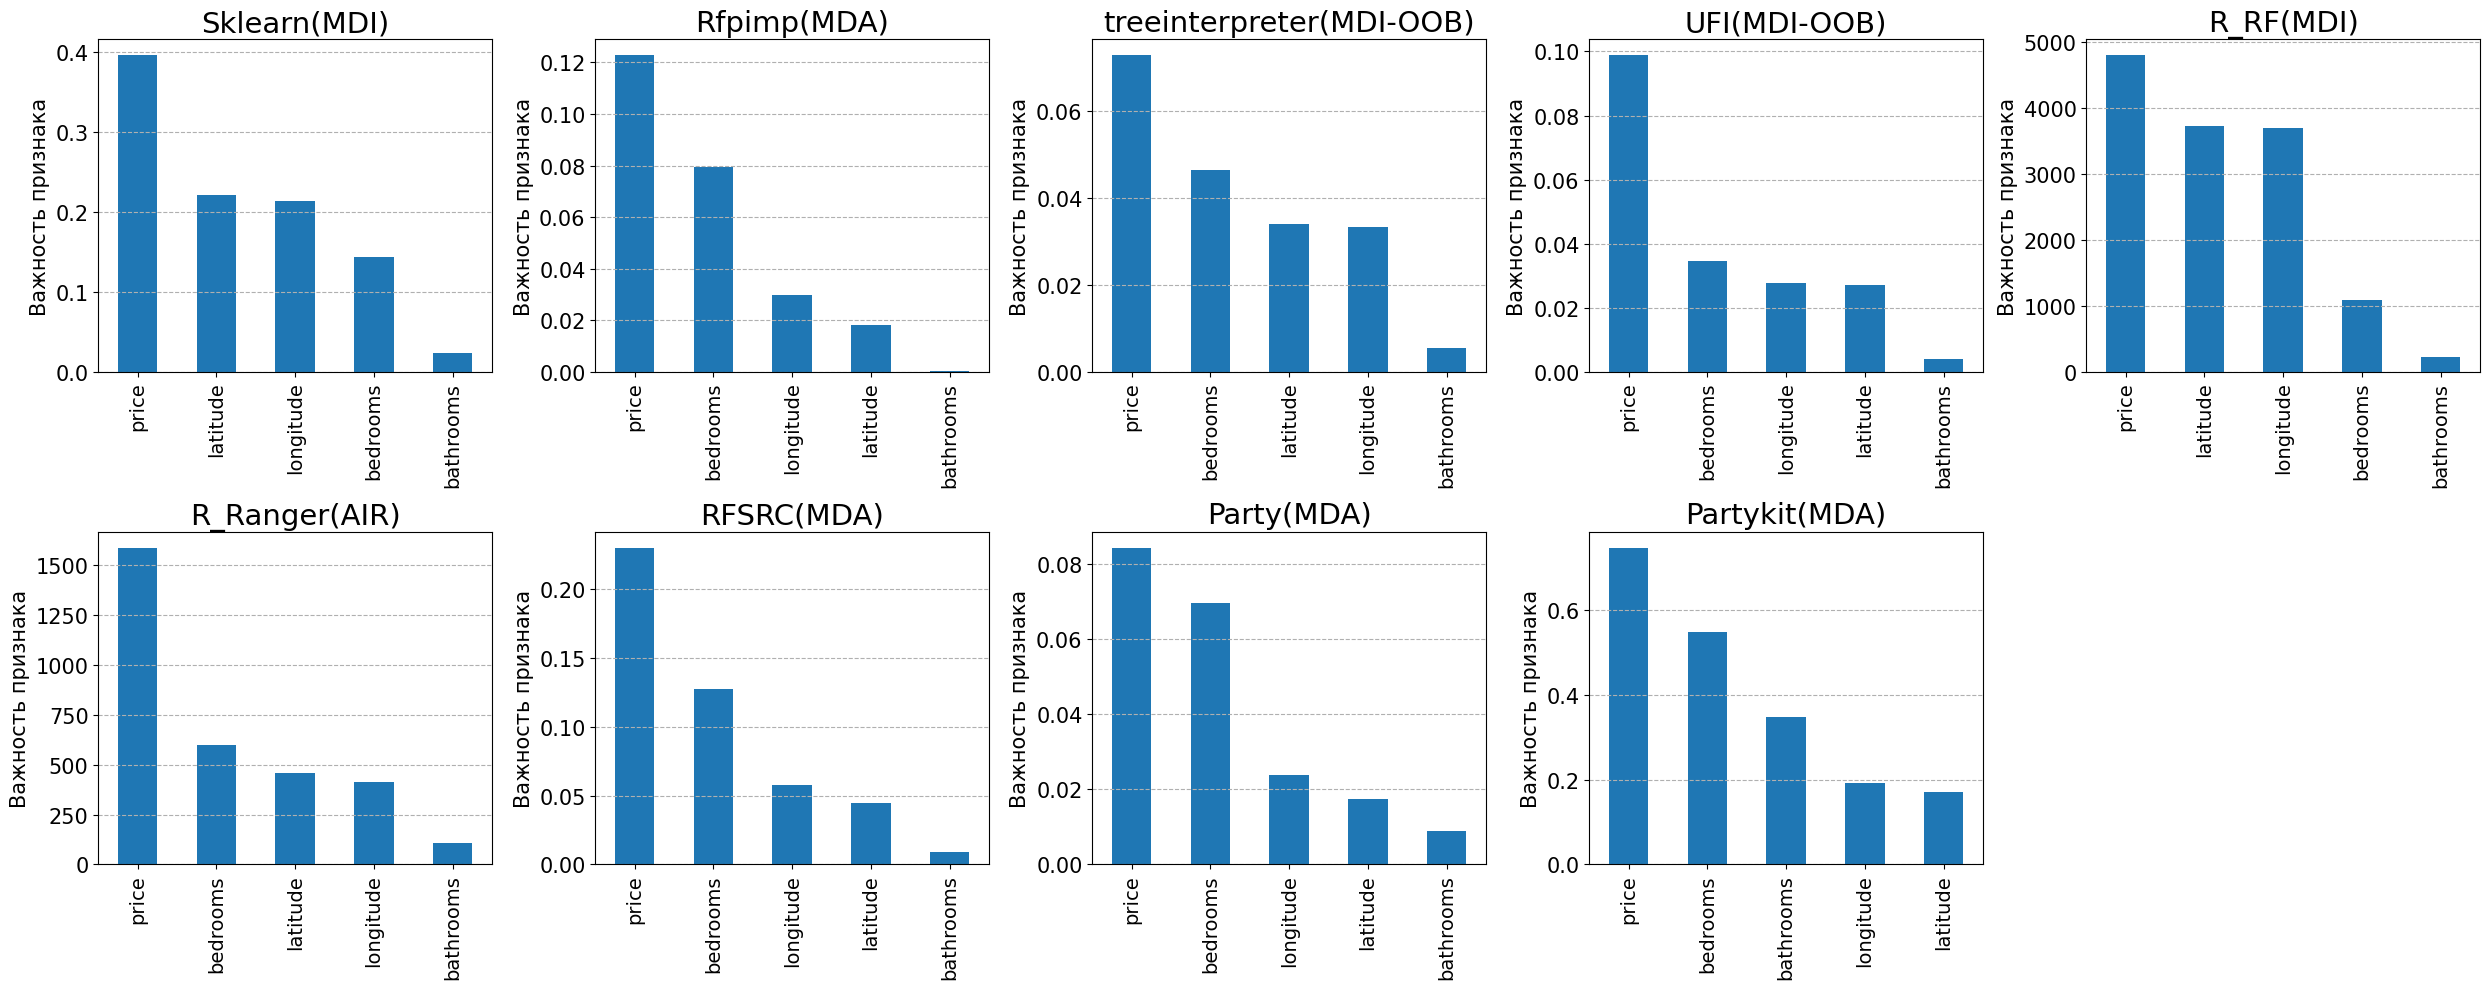

In [3]:
importance_series_list_1 = experiment(X, y)

In [4]:
importance_series_list_1

[price        0.396399
 latitude     0.221759
 longitude    0.214011
 bedrooms     0.143841
 bathrooms    0.023990
 dtype: float64,
 price        0.122784
 bedrooms     0.079526
 longitude    0.029886
 latitude     0.018033
 bathrooms    0.000304
 dtype: float64,
 price        0.072850
 bedrooms     0.046384
 latitude     0.033920
 longitude    0.033280
 bathrooms    0.005537
 dtype: float64,
 price        0.098847
 bedrooms     0.034534
 longitude    0.027695
 latitude     0.026981
 bathrooms    0.004014
 dtype: float64,
 price        4794.188859
 latitude     3728.617123
 longitude    3690.014549
 bedrooms     1092.281213
 bathrooms     229.005804
 dtype: float64,
 price        1587.149040
 bedrooms      599.812327
 latitude      457.045382
 longitude     413.802720
 bathrooms     105.175291
 dtype: float64,
 price        0.229934
 bedrooms     0.127518
 longitude    0.057566
 latitude     0.044316
 bathrooms    0.008693
 Name: randomForestSRC_MDA, dtype: float64,
 price        0.084

<font size="8">Initial features + different types of random features (random_uniform, random_normal, random_int, random_binary).</font>

In [5]:
X["random_uniform"] = np.random.uniform(
    0, 1, size=len(X))  # равномерное распределение
X["random_normal"] = np.random.normal(
    0, 1, size=len(X))  # нормальное распределение
X["random_int"] = np.random.randint(0, 100, size=len(X))  # целые числа 0-99
X["random_binary"] = np.random.choice([0, 1], size=len(X))  # бинарные значения

[I 2026-02-06 13:50:18,420] A new study created in memory with name: no-name-cef314dd-0866-43e7-a337-eff8079d40fe
[I 2026-02-06 13:50:19,523] Trial 0 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 146, 'max_depth': 2, 'min_samples_leaf': 2, 'max_features': 0.3333333333333333}. Best is trial 0 with value: 0.6962589600060789.
[I 2026-02-06 13:50:19,914] Trial 1 finished with value: 0.6971201337352144 and parameters: {'n_estimators': 43, 'max_depth': 2, 'min_samples_leaf': 6, 'max_features': 0.7}. Best is trial 1 with value: 0.6971201337352144.
[I 2026-02-06 13:50:21,101] Trial 2 finished with value: 0.7071249461766419 and parameters: {'n_estimators': 90, 'max_depth': 7, 'min_samples_leaf': 5, 'max_features': 0.7}. Best is trial 2 with value: 0.7071249461766419.
[I 2026-02-06 13:50:21,800] Trial 3 finished with value: 0.6996023403662521 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_leaf': 12, 'max_features': 0.3333333333333333}. Best is trial 

{'n_estimators': 140, 'max_depth': 13, 'min_samples_leaf': 7, 'max_features': 0.5}
best_params: {'n_estimators': 140, 'max_depth': 13, 'min_samples_leaf': 7, 'max_features': 0.5}
the importance of sklearn: price             0.317021
latitude          0.150213
longitude         0.146275
bedrooms          0.125551
random_uniform    0.078489
random_normal     0.078141
random_int        0.067354
bathrooms         0.026117
random_binary     0.010839
dtype: float64
the importance of rfpimp: price             0.111336
bedrooms          0.062000
longitude         0.017222
latitude          0.012461
bathrooms         0.001013
random_normal     0.001013
random_uniform    0.000709
random_binary    -0.000709
random_int       -0.000810
dtype: float64
the importance of treeinterpreter: price             0.067255
bedrooms          0.044564
latitude          0.026607
longitude         0.026579
random_normal     0.007382
random_uniform    0.007150
random_int        0.007069
bathrooms         0.006791
r

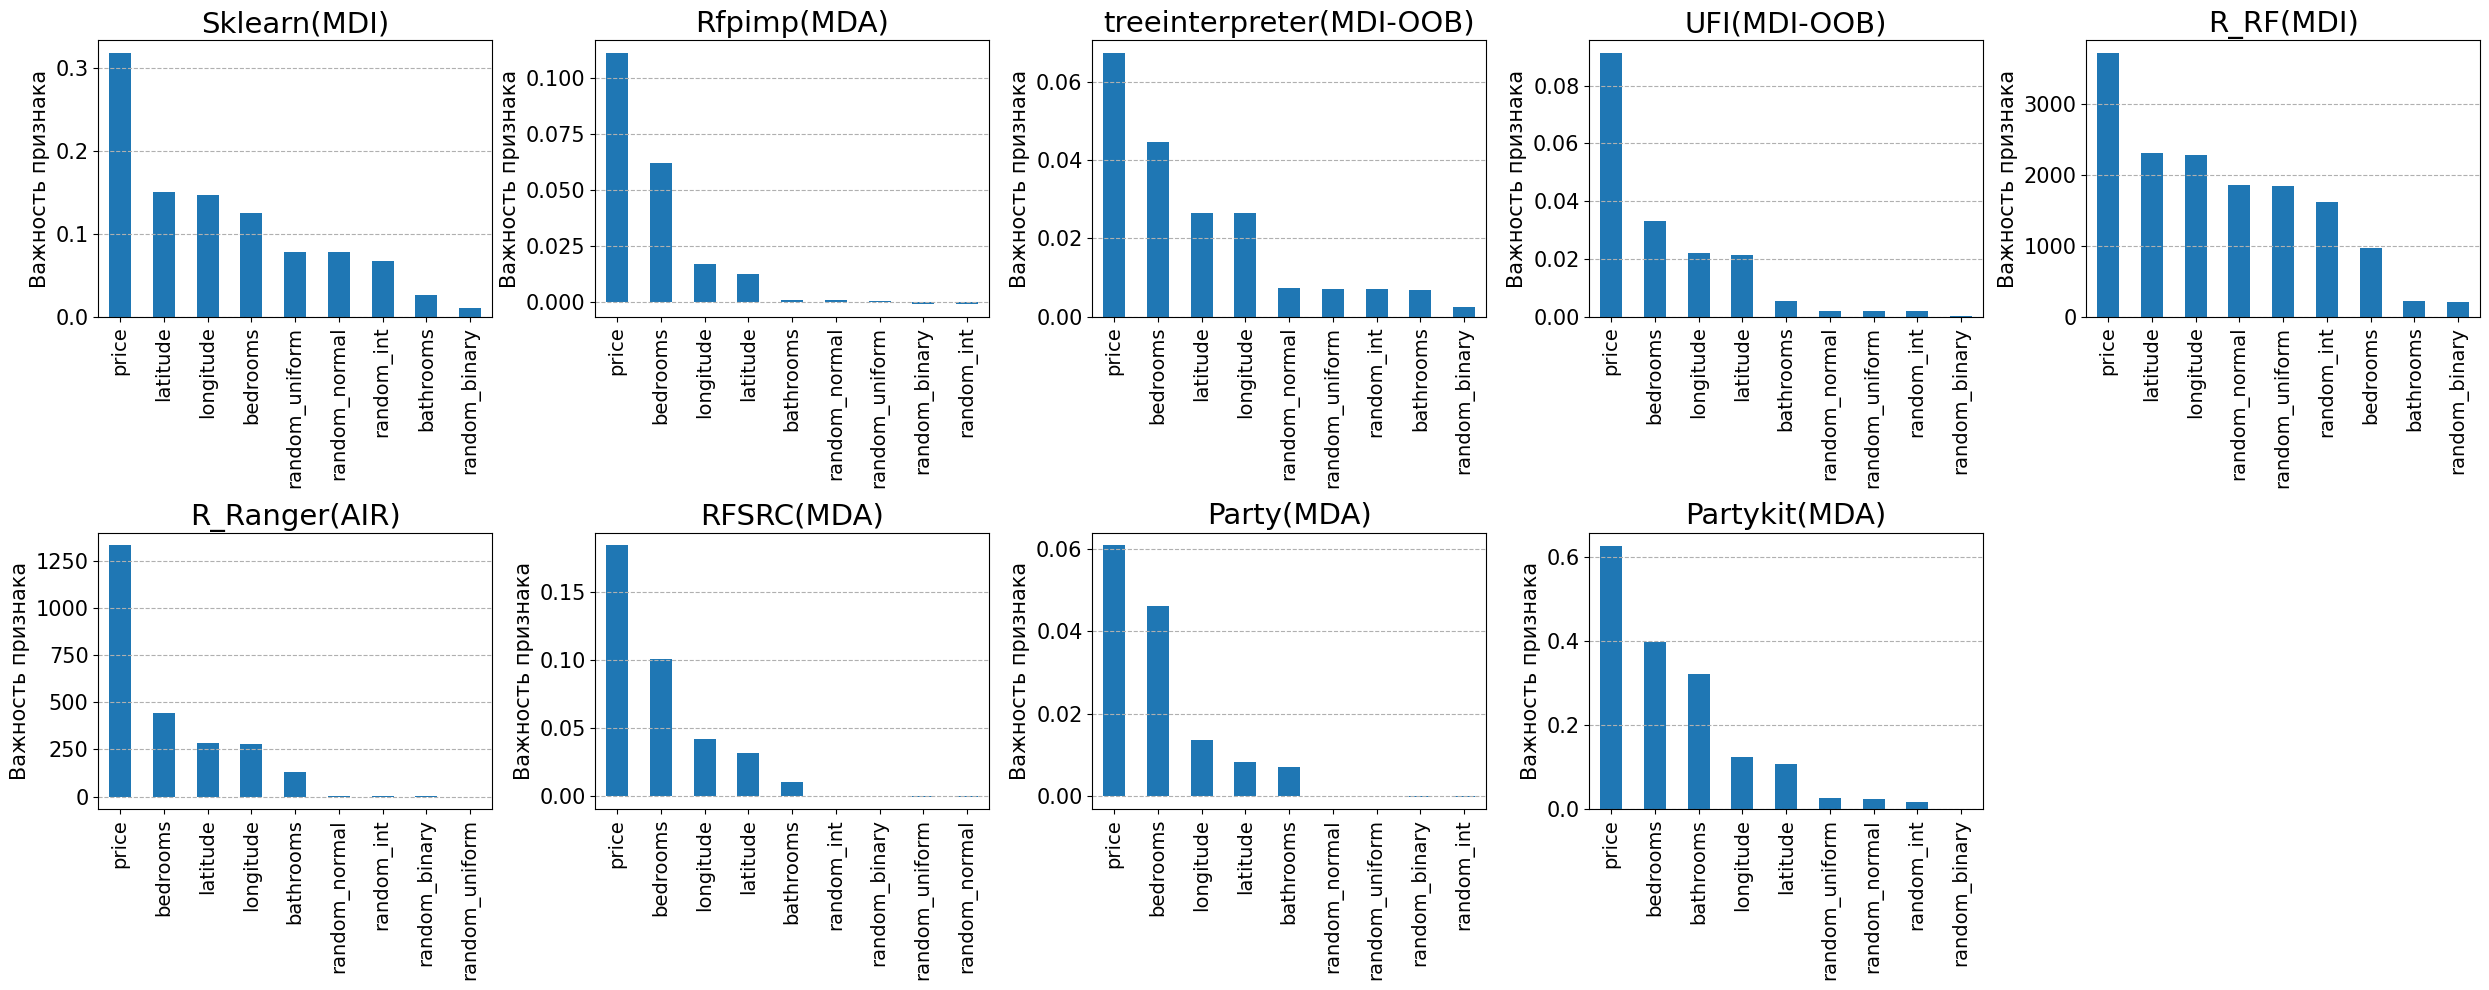

In [6]:
importance_series_list_2 = experiment(X, y)

In [7]:
importance_series_list_2

[price             0.317021
 latitude          0.150213
 longitude         0.146275
 bedrooms          0.125551
 random_uniform    0.078489
 random_normal     0.078141
 random_int        0.067354
 bathrooms         0.026117
 random_binary     0.010839
 dtype: float64,
 price             0.111336
 bedrooms          0.062000
 longitude         0.017222
 latitude          0.012461
 bathrooms         0.001013
 random_normal     0.001013
 random_uniform    0.000709
 random_binary    -0.000709
 random_int       -0.000810
 dtype: float64,
 price             0.067255
 bedrooms          0.044564
 latitude          0.026607
 longitude         0.026579
 random_normal     0.007382
 random_uniform    0.007150
 random_int        0.007069
 bathrooms         0.006791
 random_binary     0.002373
 dtype: float64,
 price             0.091138
 bedrooms          0.032989
 longitude         0.021938
 latitude          0.021272
 bathrooms         0.005549
 random_normal     0.002147
 random_uniform    0.0020

<font size="8">Source features + copy of the 'price' feature.</font>

In [8]:
X = X.drop(["random_int", "random_binary",
           "random_uniform", "random_normal"], axis=1)

X["price1"] = X["price"]
X["price2"] = X["price"]
X["price3"] = X["price"]

[I 2026-02-06 14:46:57,142] A new study created in memory with name: no-name-784f0ea5-bed5-45e7-bf05-f4cec6473924
[I 2026-02-06 14:46:58,026] Trial 0 finished with value: 0.7112281857095818 and parameters: {'n_estimators': 91, 'max_depth': 15, 'min_samples_leaf': 11, 'max_features': 0.25}. Best is trial 0 with value: 0.7112281857095818.
[I 2026-02-06 14:46:59,038] Trial 1 finished with value: 0.7129252045287606 and parameters: {'n_estimators': 106, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7129252045287606.
[I 2026-02-06 14:46:59,329] Trial 2 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 49, 'max_depth': 1, 'min_samples_leaf': 14, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7129252045287606.
[I 2026-02-06 14:46:59,642] Trial 3 finished with value: 0.7060864719738609 and parameters: {'n_estimators': 33, 'max_depth': 10, 'min_samples_leaf': 15, 'max_features': 0.3333333333333333}. Best is trial 1 w

{'n_estimators': 55, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 0.5}
best_params: {'n_estimators': 55, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 0.5}
the importance of sklearn: latitude     0.211180
longitude    0.205103
bedrooms     0.156460
price        0.110812
price1       0.108309
price3       0.100932
price2       0.091096
bathrooms    0.016108
dtype: float64
the importance of rfpimp: bedrooms     0.080539
longitude    0.029987
latitude     0.017931
price        0.008510
price1       0.007091
price3       0.006484
price2       0.002330
bathrooms    0.001216
dtype: float64
the importance of treeinterpreter: bedrooms     0.052303
longitude    0.034267
latitude     0.032207
price        0.020774
price1       0.020426
price3       0.018565
price2       0.016346
bathrooms    0.005136
dtype: float64
the importance of ufi: bedrooms     0.041439
price        0.029391
price1       0.026239
latitude     0.025794
longitude    0.025480
price3       0.023813
price2 

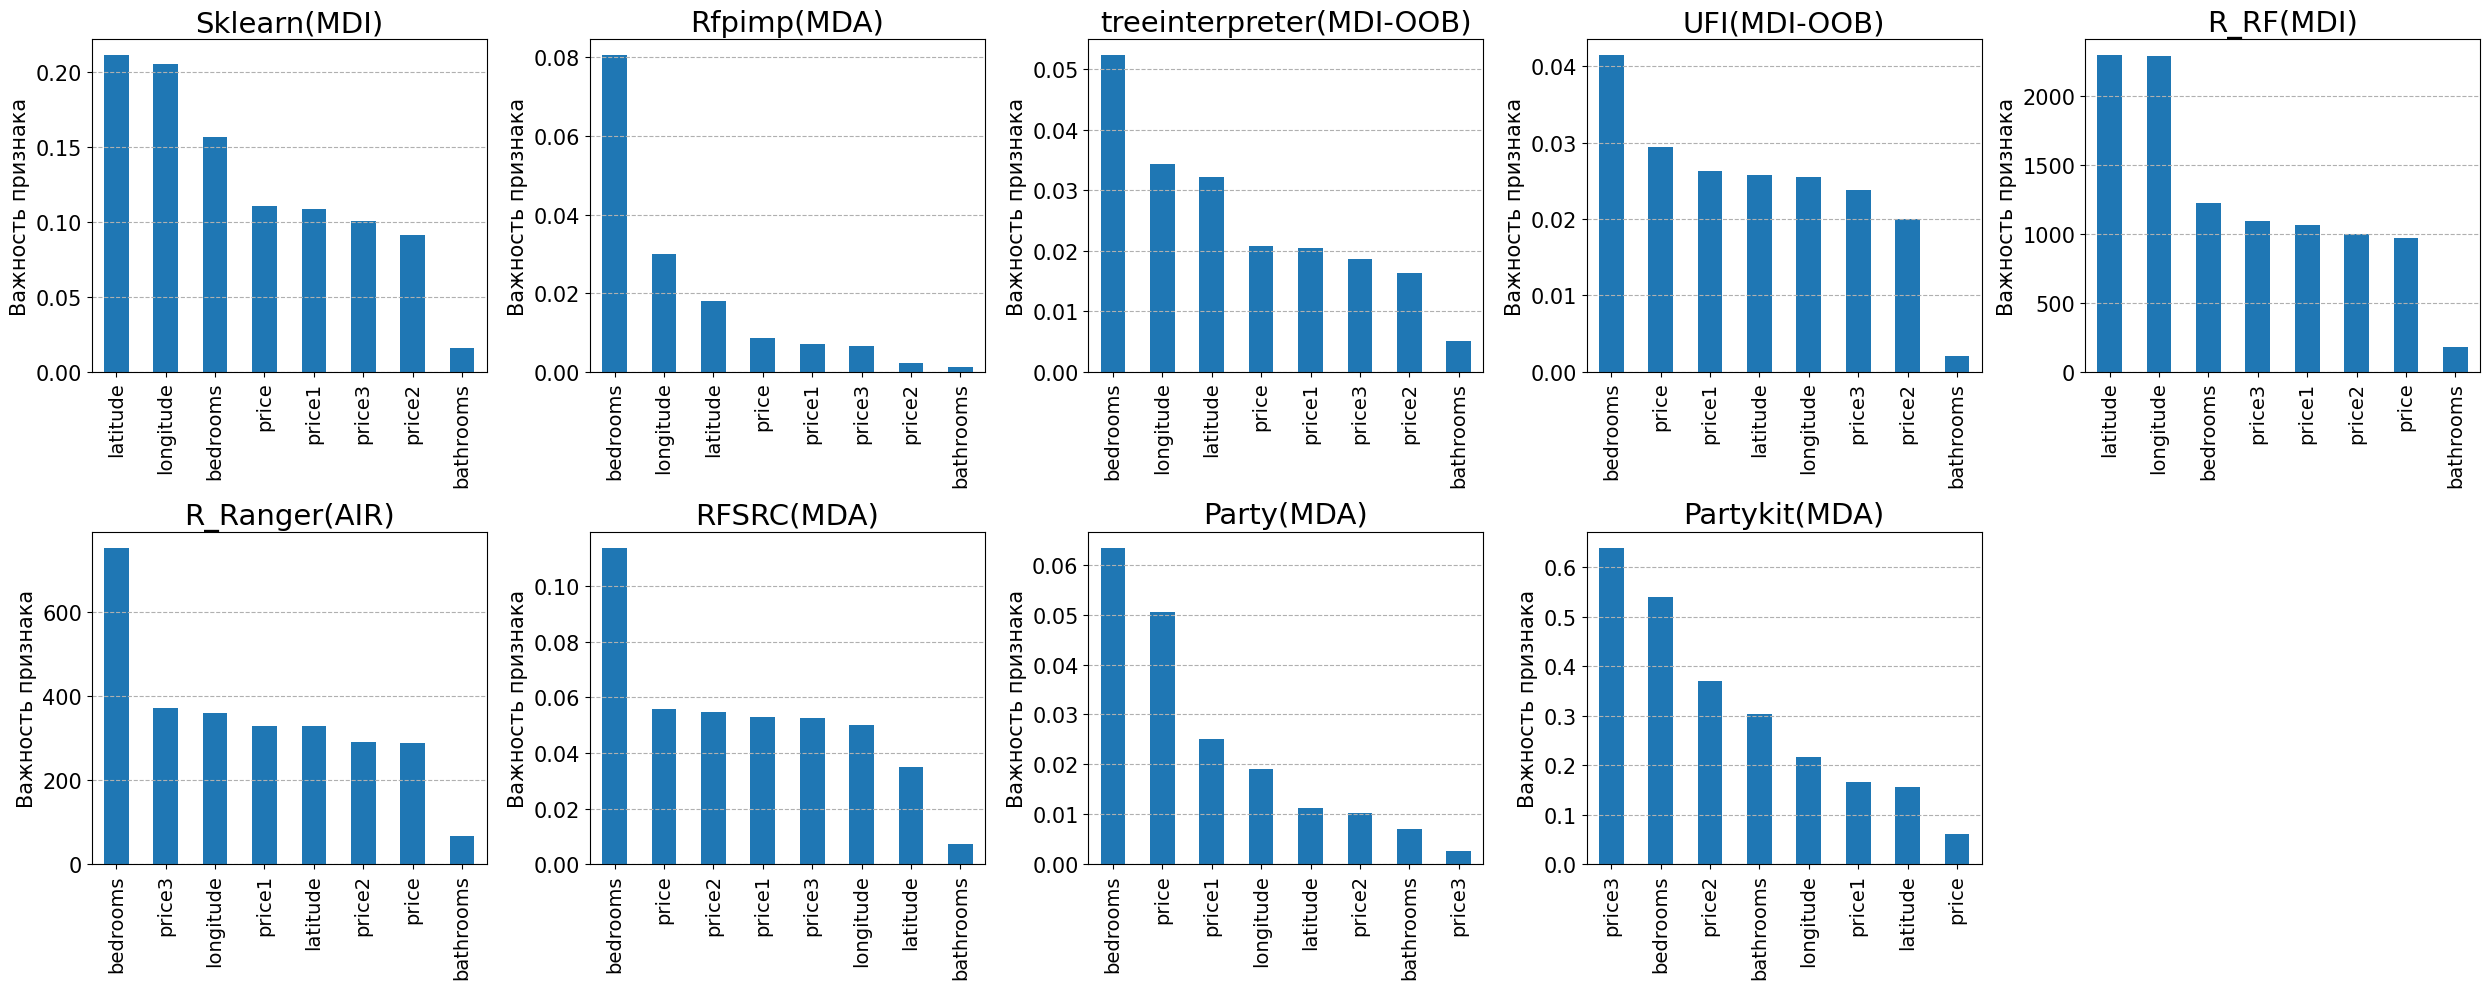

In [9]:
importance_series_list_3 = experiment(X, y)

In [10]:
importance_series_list_3

[latitude     0.211180
 longitude    0.205103
 bedrooms     0.156460
 price        0.110812
 price1       0.108309
 price3       0.100932
 price2       0.091096
 bathrooms    0.016108
 dtype: float64,
 bedrooms     0.080539
 longitude    0.029987
 latitude     0.017931
 price        0.008510
 price1       0.007091
 price3       0.006484
 price2       0.002330
 bathrooms    0.001216
 dtype: float64,
 bedrooms     0.052303
 longitude    0.034267
 latitude     0.032207
 price        0.020774
 price1       0.020426
 price3       0.018565
 price2       0.016346
 bathrooms    0.005136
 dtype: float64,
 bedrooms     0.041439
 price        0.029391
 price1       0.026239
 latitude     0.025794
 longitude    0.025480
 price3       0.023813
 price2       0.020064
 bathrooms    0.002065
 dtype: float64,
 latitude     2292.128373
 longitude    2288.724002
 bedrooms     1220.619491
 price3       1092.742696
 price1       1060.094772
 price2        997.177949
 price         968.051479
 bathrooms    

<font size="8">Initial features + random feature random.</font>

In [11]:
X = X.drop(["price1", "price2", "price3"], axis=1)
X["random"] = np.random.random(size=len(X))

[I 2026-02-06 15:04:19,215] A new study created in memory with name: no-name-bd70acfe-5508-4689-91f1-1474725be80f
[I 2026-02-06 15:04:19,774] Trial 0 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 80, 'max_depth': 2, 'min_samples_leaf': 14, 'max_features': 0.25}. Best is trial 0 with value: 0.6962589600060789.
[I 2026-02-06 15:04:20,297] Trial 1 finished with value: 0.700159570426281 and parameters: {'n_estimators': 68, 'max_depth': 5, 'min_samples_leaf': 17, 'max_features': 0.3333333333333333}. Best is trial 1 with value: 0.700159570426281.
[I 2026-02-06 15:04:20,559] Trial 2 finished with value: 0.7024898052227654 and parameters: {'n_estimators': 26, 'max_depth': 7, 'min_samples_leaf': 18, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.7024898052227654.
[I 2026-02-06 15:04:21,771] Trial 3 finished with value: 0.7040601808464831 and parameters: {'n_estimators': 143, 'max_depth': 8, 'min_samples_leaf': 9, 'max_features': 0.3333333333333333}. Best is tr

{'n_estimators': 149, 'max_depth': 12, 'min_samples_leaf': 15, 'max_features': 1.0}
best_params: {'n_estimators': 149, 'max_depth': 12, 'min_samples_leaf': 15, 'max_features': 1.0}
the importance of sklearn: price        0.380075
longitude    0.190621
latitude     0.187545
bedrooms     0.136471
random       0.095051
bathrooms    0.010238
dtype: float64
the importance of rfpimp: price        0.130990
bedrooms     0.076791
longitude    0.033836
latitude     0.012866
bathrooms    0.001418
random       0.000304
dtype: float64
the importance of treeinterpreter: price        0.076163
bedrooms     0.049569
longitude    0.039521
latitude     0.033242
random       0.011334
bathrooms    0.003512
dtype: float64
the importance of ufi: price        0.102557
bedrooms     0.034004
longitude    0.026765
latitude     0.022646
random       0.002175
bathrooms    0.001005
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + random
Importance 

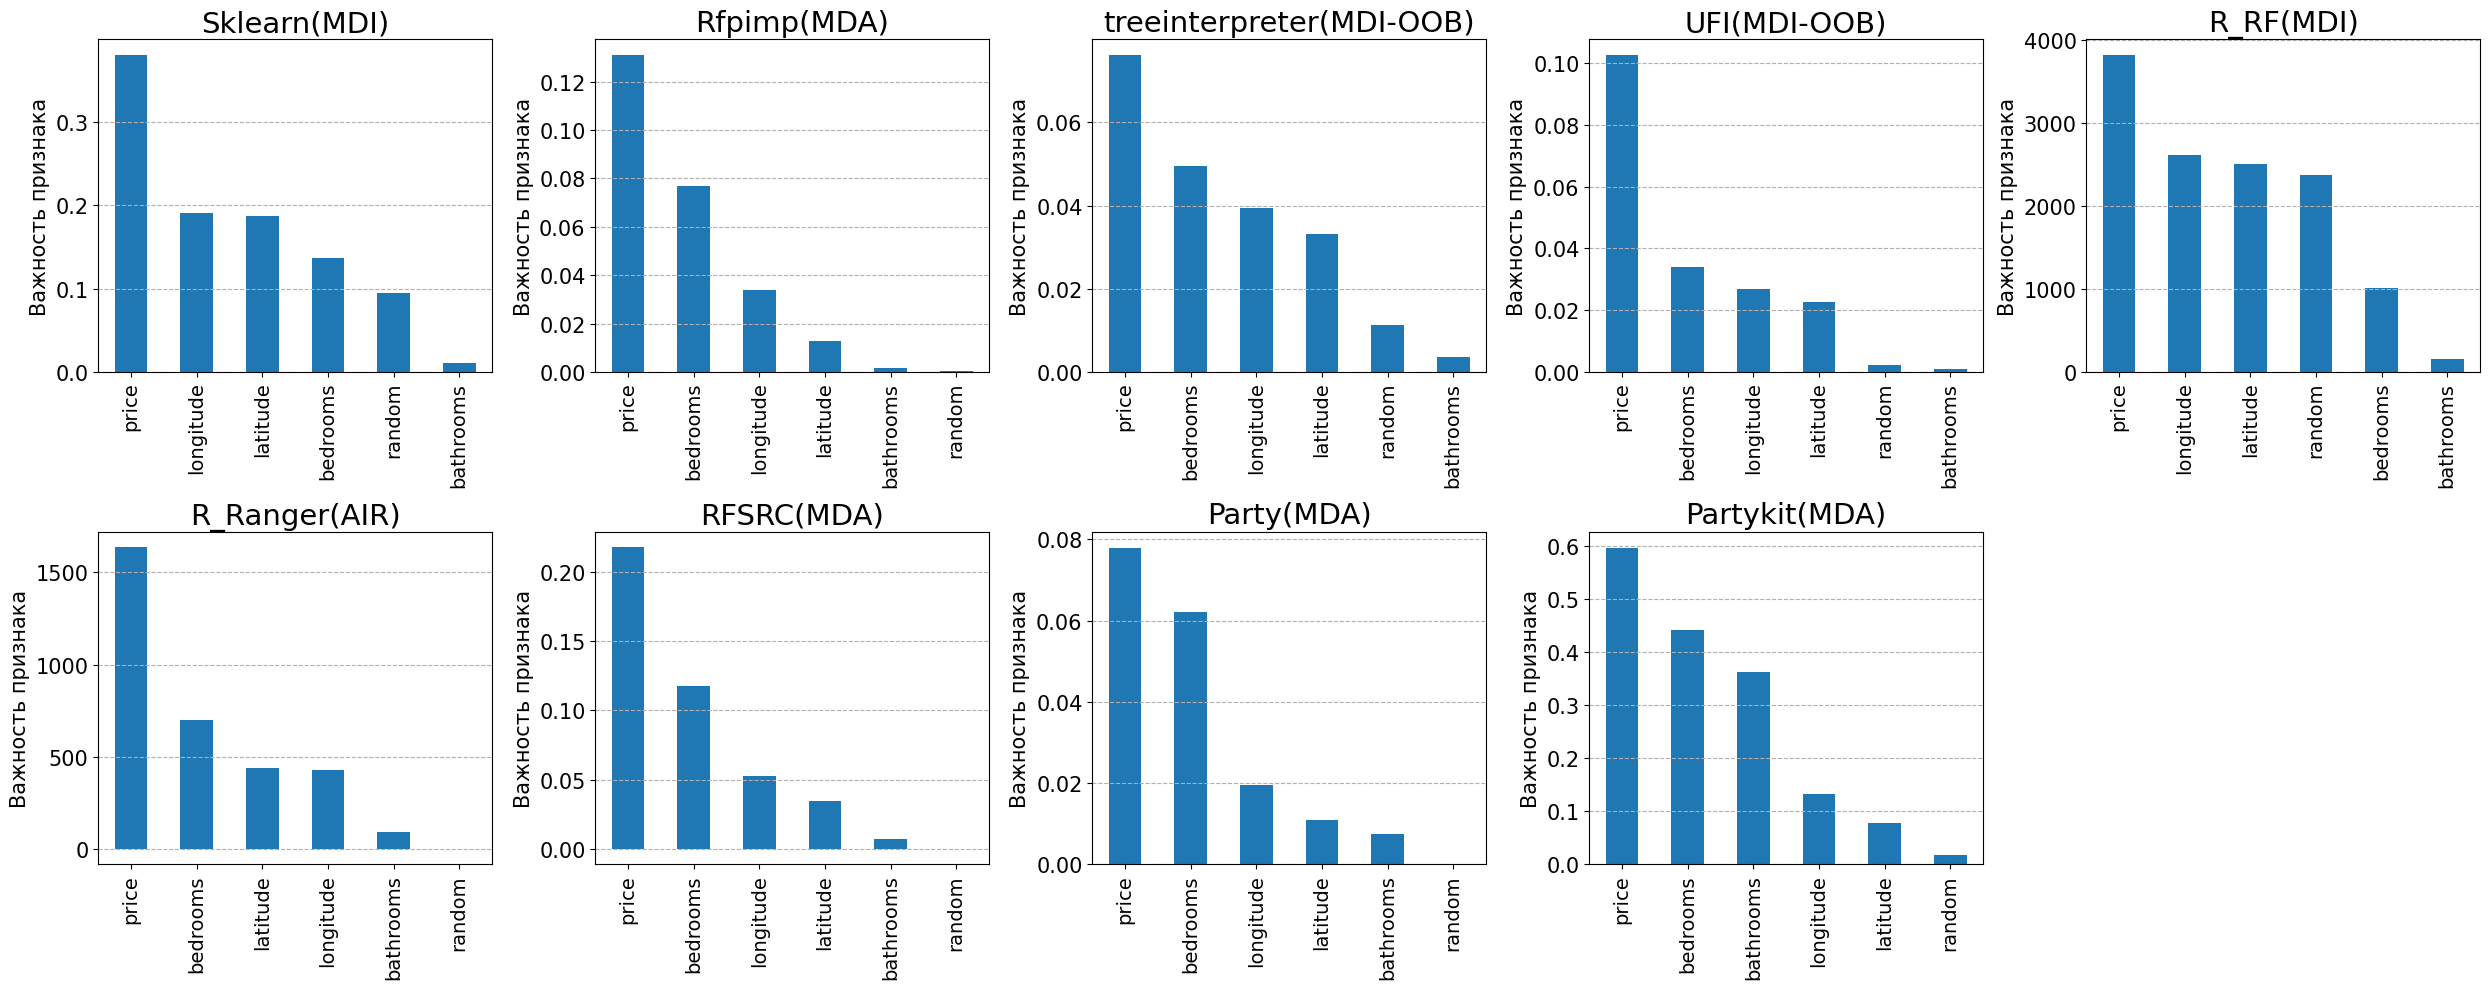

In [12]:
importance_series_list_4 = experiment(X, y)

In [13]:
importance_series_list_4

[price        0.380075
 longitude    0.190621
 latitude     0.187545
 bedrooms     0.136471
 random       0.095051
 bathrooms    0.010238
 dtype: float64,
 price        0.130990
 bedrooms     0.076791
 longitude    0.033836
 latitude     0.012866
 bathrooms    0.001418
 random       0.000304
 dtype: float64,
 price        0.076163
 bedrooms     0.049569
 longitude    0.039521
 latitude     0.033242
 random       0.011334
 bathrooms    0.003512
 dtype: float64,
 price        0.102557
 bedrooms     0.034004
 longitude    0.026765
 latitude     0.022646
 random       0.002175
 bathrooms    0.001005
 dtype: float64,
 price        3818.715088
 longitude    2613.510024
 latitude     2503.337778
 random       2371.717251
 bedrooms     1014.788152
 bathrooms     157.956647
 dtype: float64,
 price        1638.390588
 bedrooms      698.106756
 latitude      438.597048
 longitude     429.077648
 bathrooms      95.547655
 random         -0.376061
 dtype: float64,
 price        0.217895
 bedrooms  

<font size="8">Rendering all cases.</font>

<font size="4">Source features.</font>

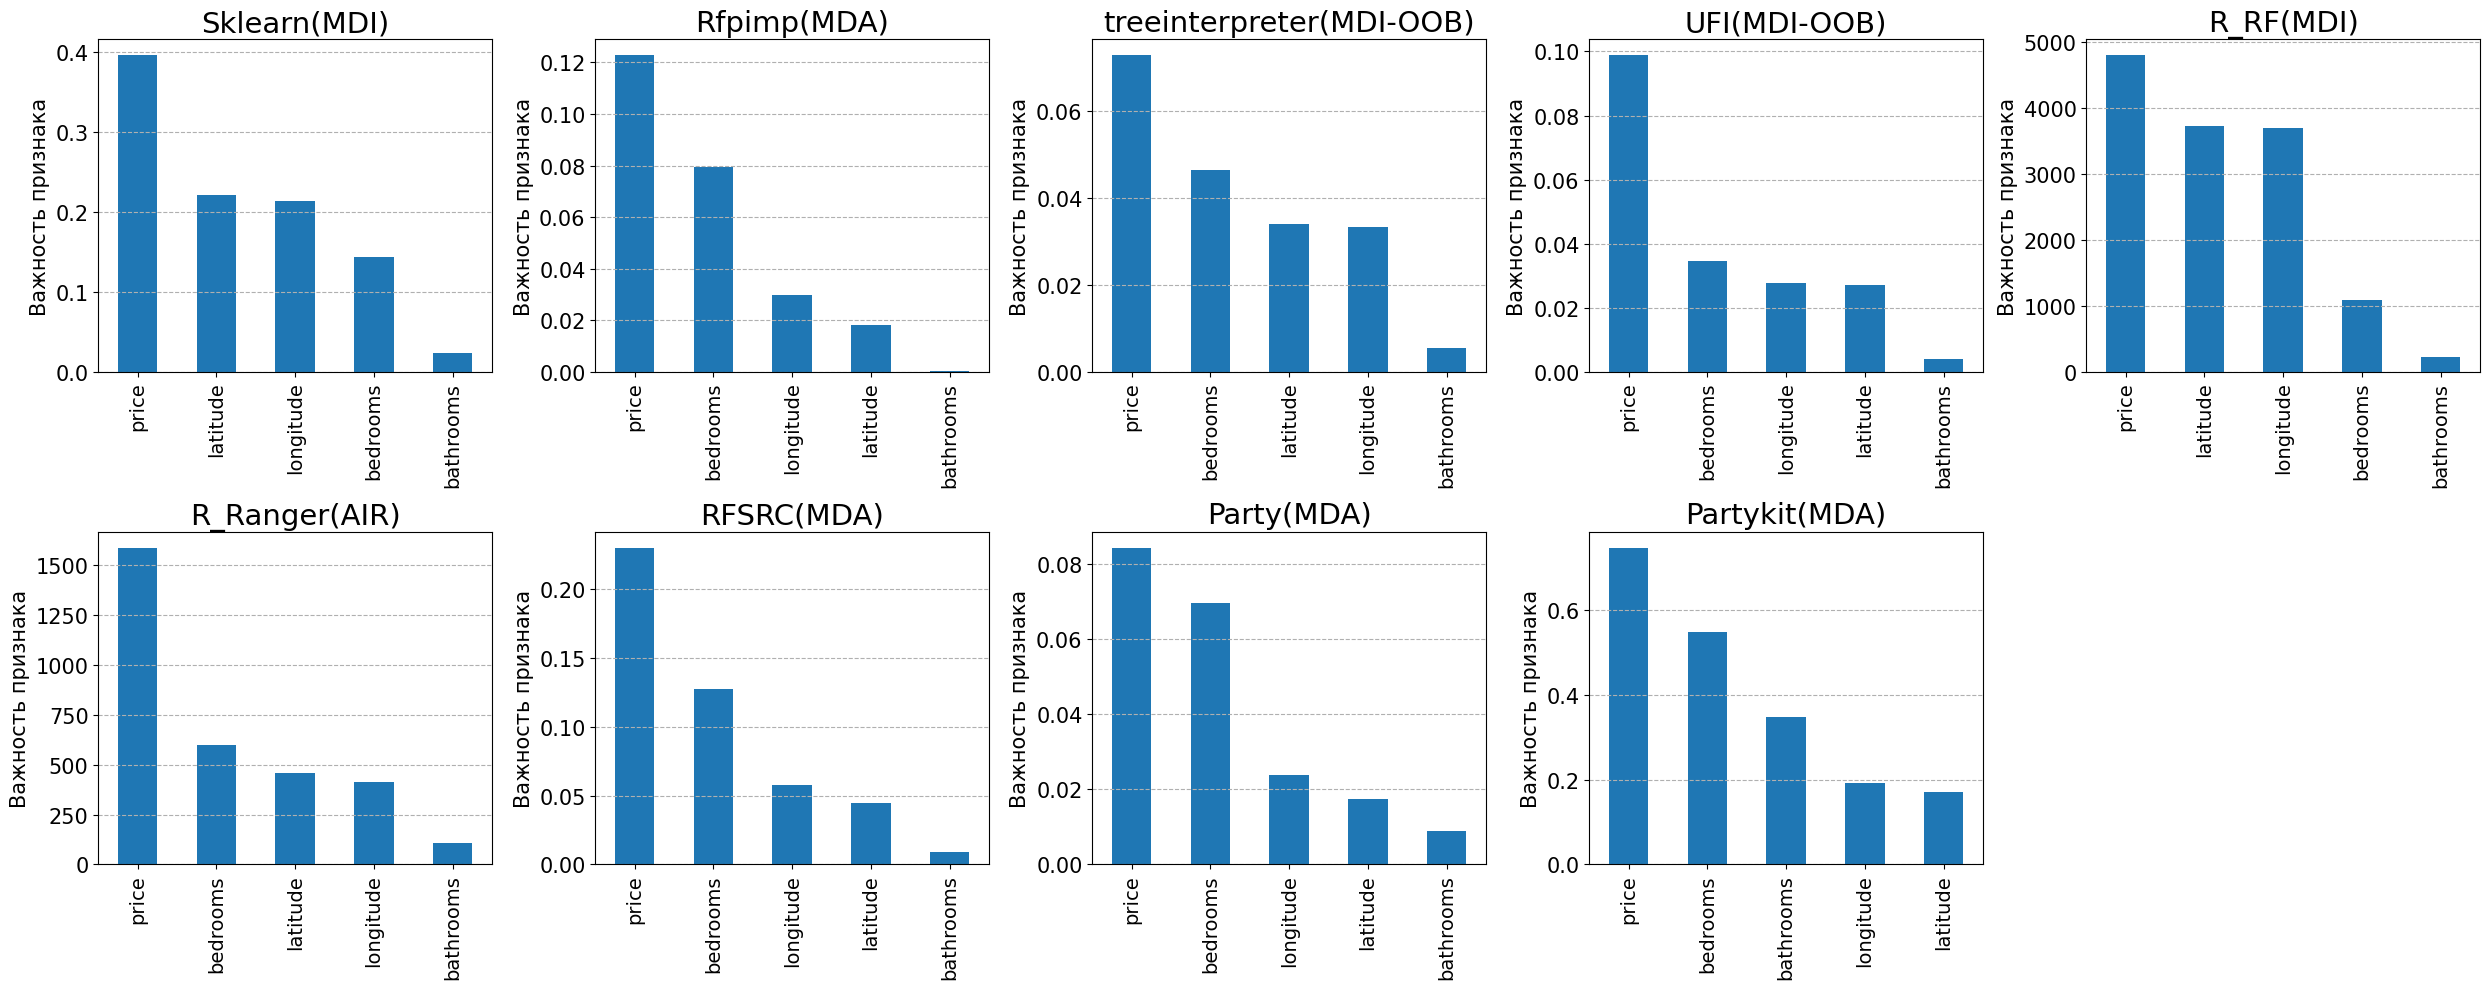

In [14]:
titles_list = ['Sklearn(MDI)', 'Rfpimp(MDA)', 'treeinterpreter(MDI-OOB)', 'UFI(MDI-OOB)', 'R_RF(MDI)',
               'R_Ranger(AIR)', 'RFSRC(MDA)', 'Party(MDA)', 'Partykit(MDA)']

picture(importance_series_list_1, titles_list)


<font size="4">Initial features + different types of random features (random_uniform, random_normal, random_int, random_binary).</font>

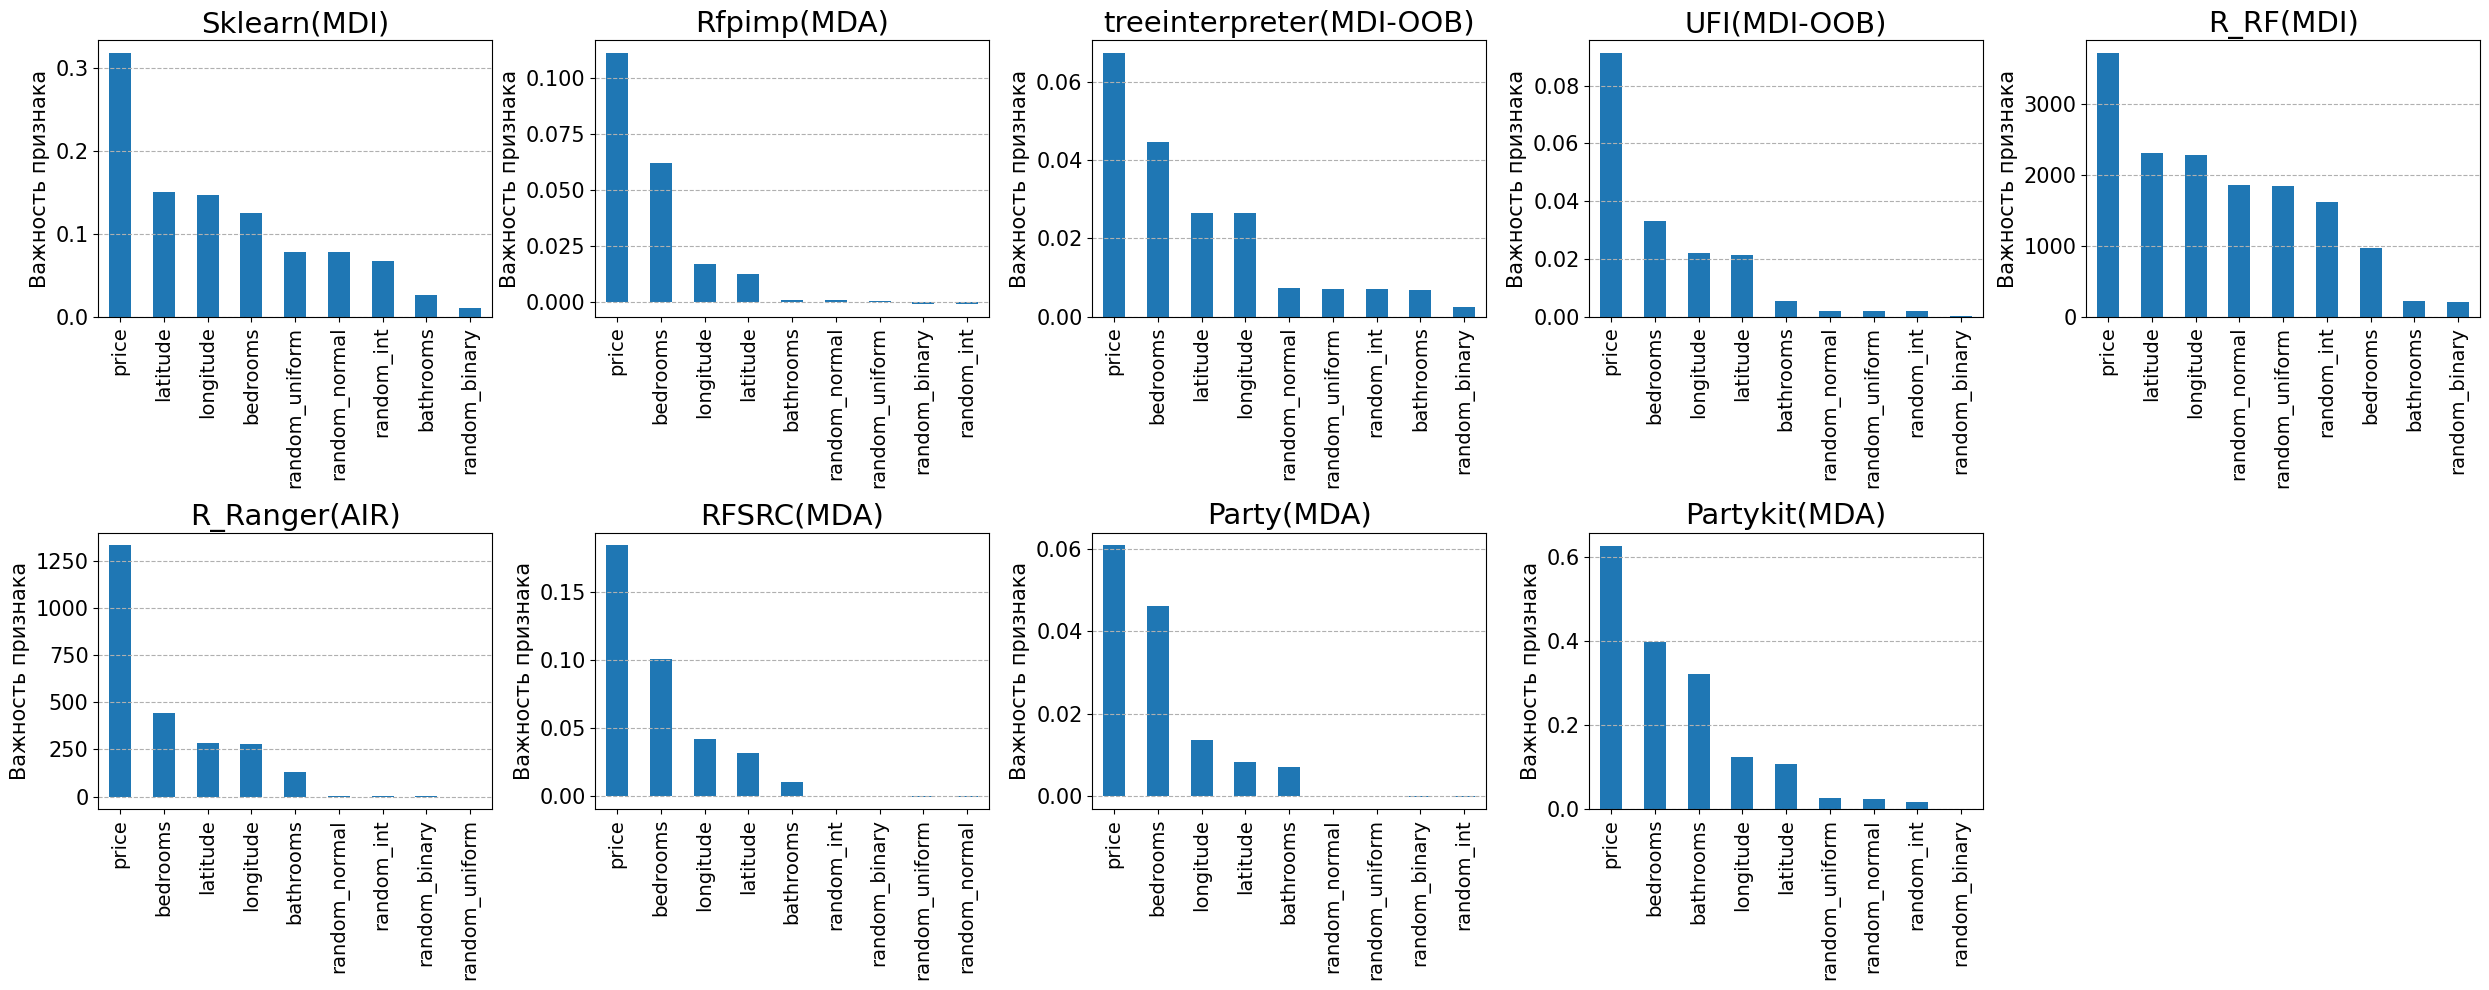

In [15]:
picture(importance_series_list_2, titles_list)

<font size="4">Source features + copy of the 'price' feature.</font>

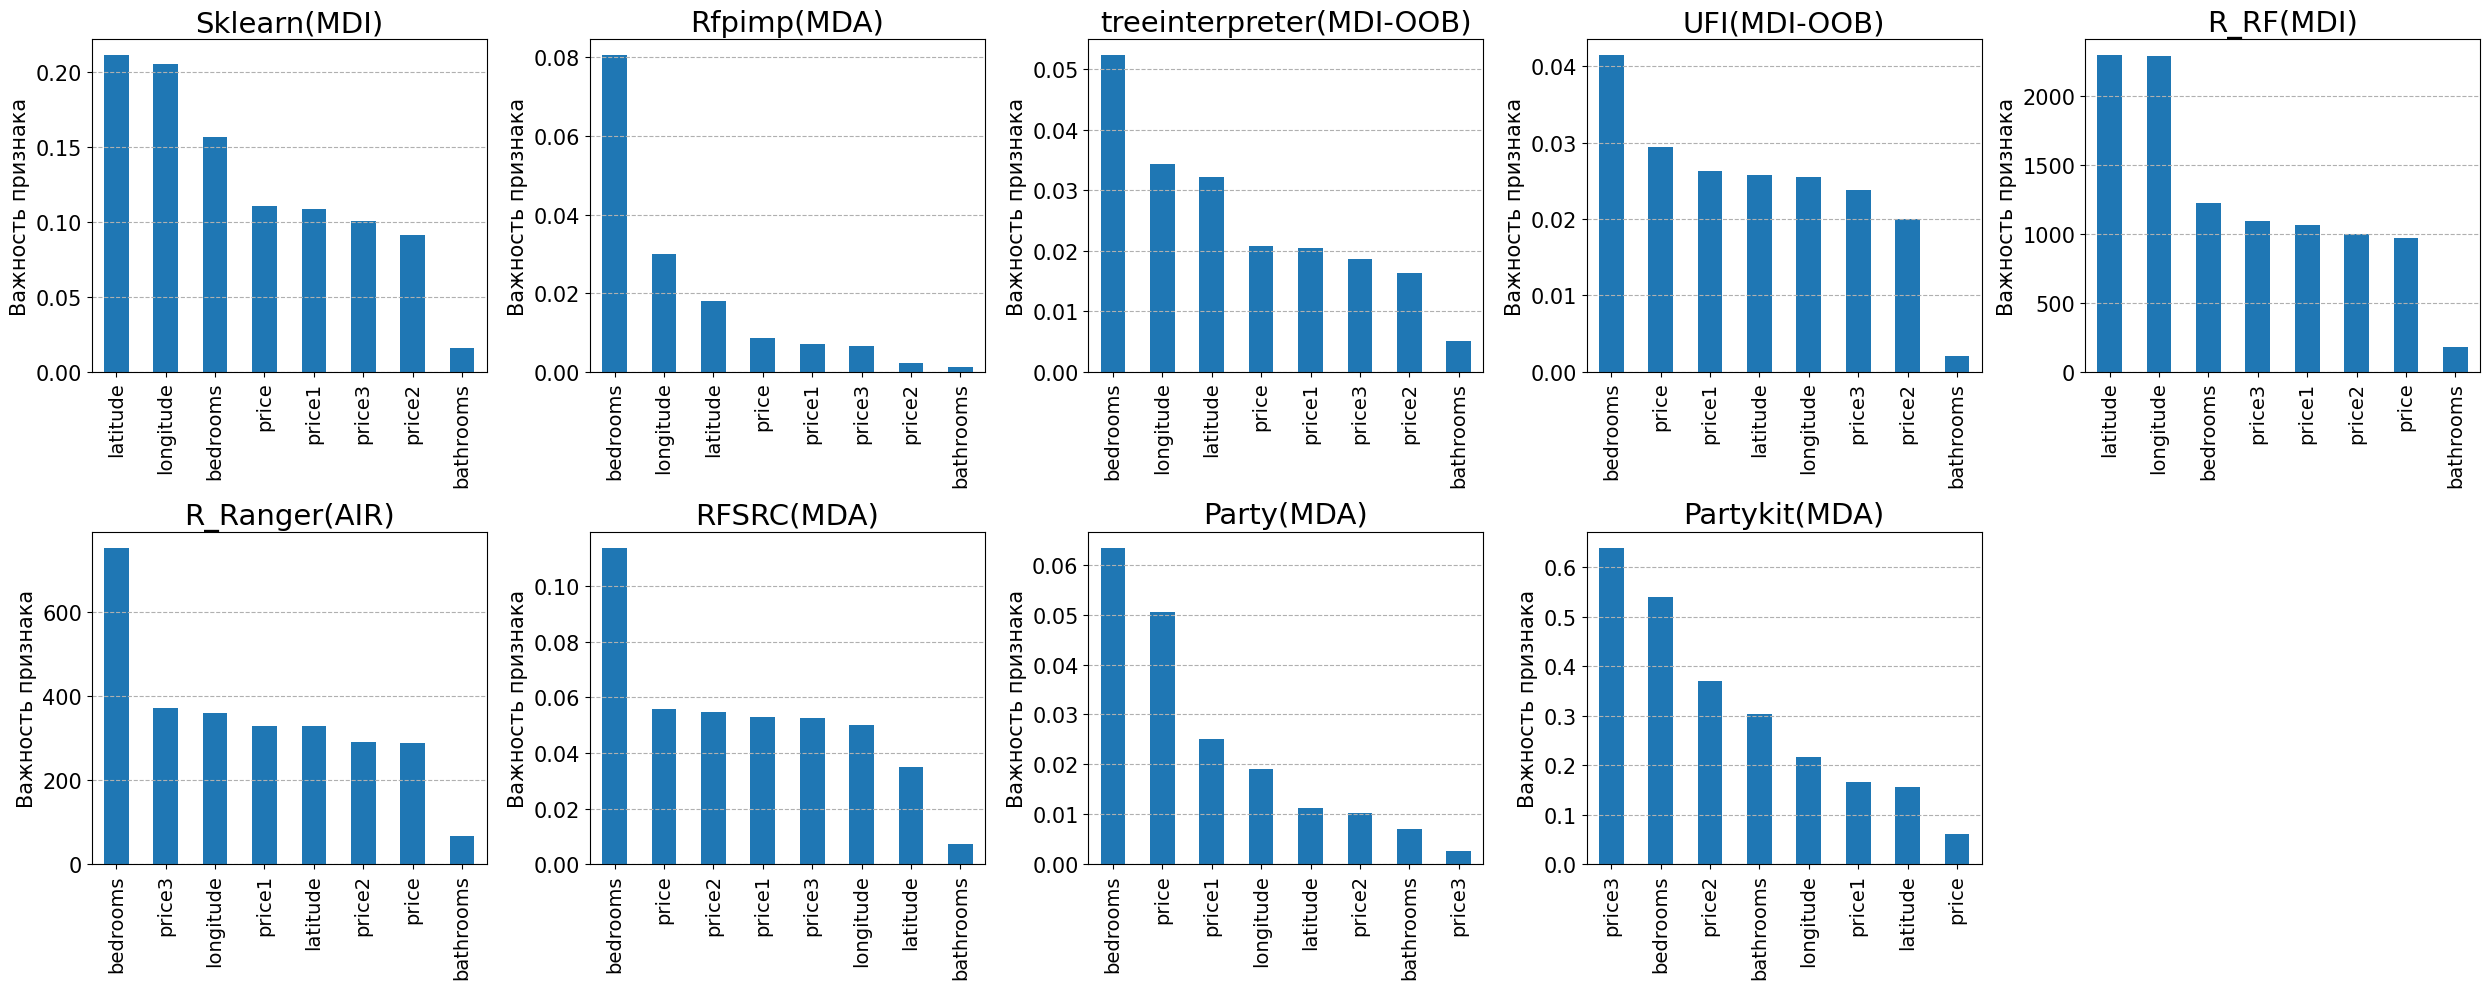

In [16]:
picture(importance_series_list_3, titles_list)

<font size="4">Initial features + random feature random.</font>

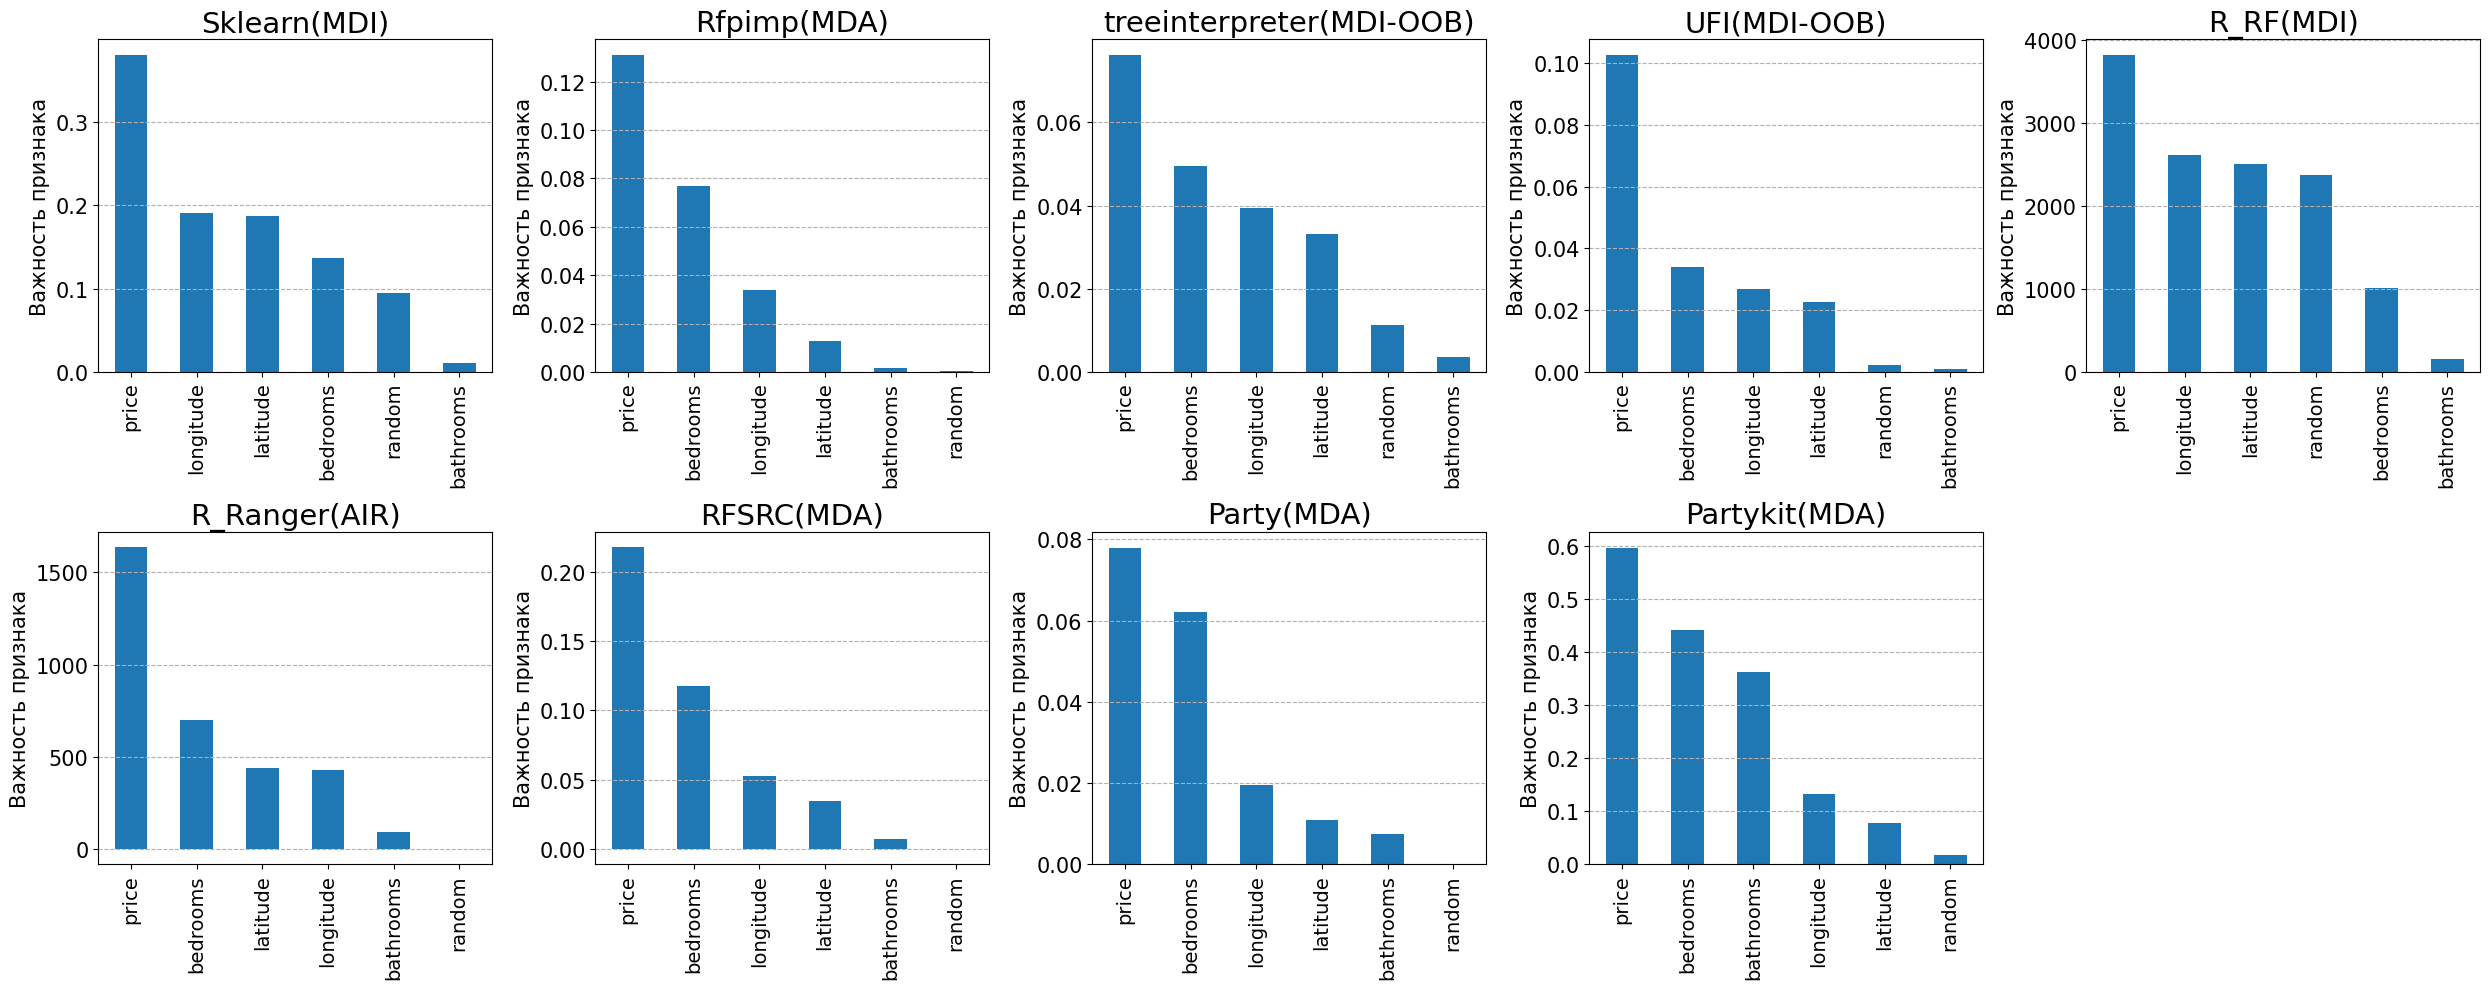

In [17]:
picture(importance_series_list_4, titles_list)